In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics as skm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('clean_data.csv')

In [3]:
data.head()

,Unnamed: 0,label,company years,internet activity,industry_Advertising,industry_Analytics,industry_Career / Job Search,industry_Classifieds,industry_CleanTech,industry_Cloud Computing,...,"Survival through recession, based on existence of the company through recession times_yes",Gartner hype cycle stage_peak,Gartner hype cycle stage_plateau,Gartner hype cycle stage_slope,Gartner hype cycle stage_trigger,Gartner hype cycle stage_trough,Time to maturity of technology (in years)_0 to 2,Time to maturity of technology (in years)_0 to 5,Time to maturity of technology (in years)_2 to 5,Time to maturity of technology (in years)_5 to 10
0,0,1,4.605327,-1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,3.000000,125.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,1,3.000000,455.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,1,5.000000,-99.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,1,4.000000,496.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [4]:
data.shape

(472, 215)

In [5]:
label=data.iloc[:,1]

In [6]:
x=data.iloc[:,2:]

In [7]:
train,test,trainy,testy=train_test_split(x,label,test_size=0.20, random_state=6)

In [8]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [9]:
pca = PCA(n_components=25)
pr = pca.fit(train)

In [10]:
pca.explained_variance_ratio_*100

array([7.40706068, 3.62917406, 3.57907043, 3.00229206, 2.61625218,
       2.12289004, 2.05511486, 1.99388811, 1.81081037, 1.73898208,
       1.64654478, 1.556546  , 1.52878693, 1.44977645, 1.36213296,
       1.34925259, 1.31949898, 1.29426599, 1.2606874 , 1.22977821,
       1.17788188, 1.16241961, 1.12227236, 1.08442745, 1.0569201 ])

<IPython.core.display.Javascript object>


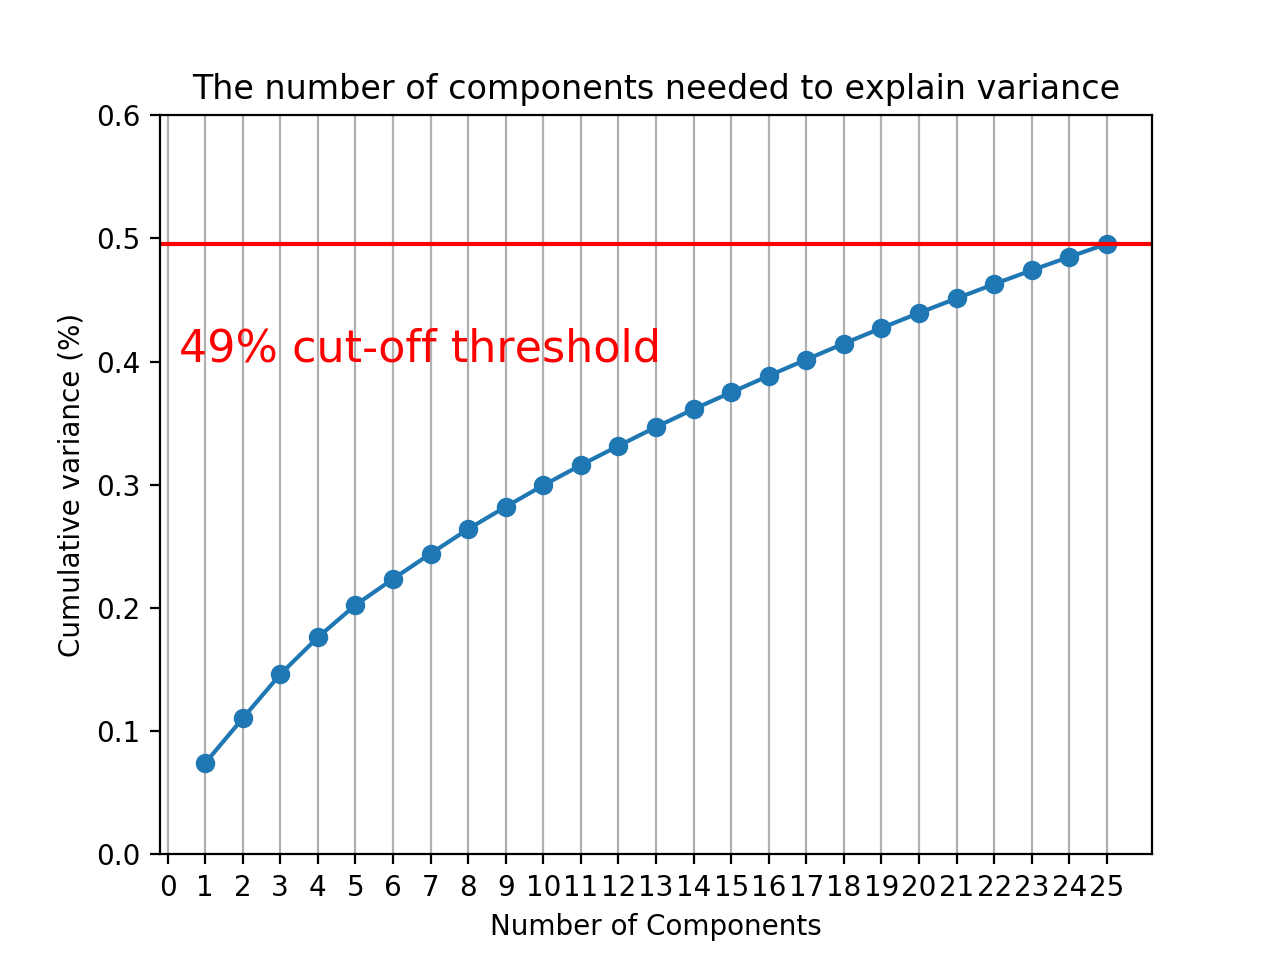

In [11]:
%matplotlib notebook
fig, ax = plt.subplots()
xi = np.arange(1, 26, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,0.6)
plt.plot(xi, y, marker='o')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 26, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=y[-1], color='r')
plt.text(0.3, 0.4, str(int(y[-1]*100))+'% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [12]:
trainX = pca.transform(train)
testX = pca.transform(test)

# Logistic regression

In [13]:
logistic = LogisticRegression()
logistic.fit(trainX,trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predicted=logistic.predict(testX)

In [15]:
logistic.score(testX,testy)

0.9052631578947369

<IPython.core.display.Javascript object>


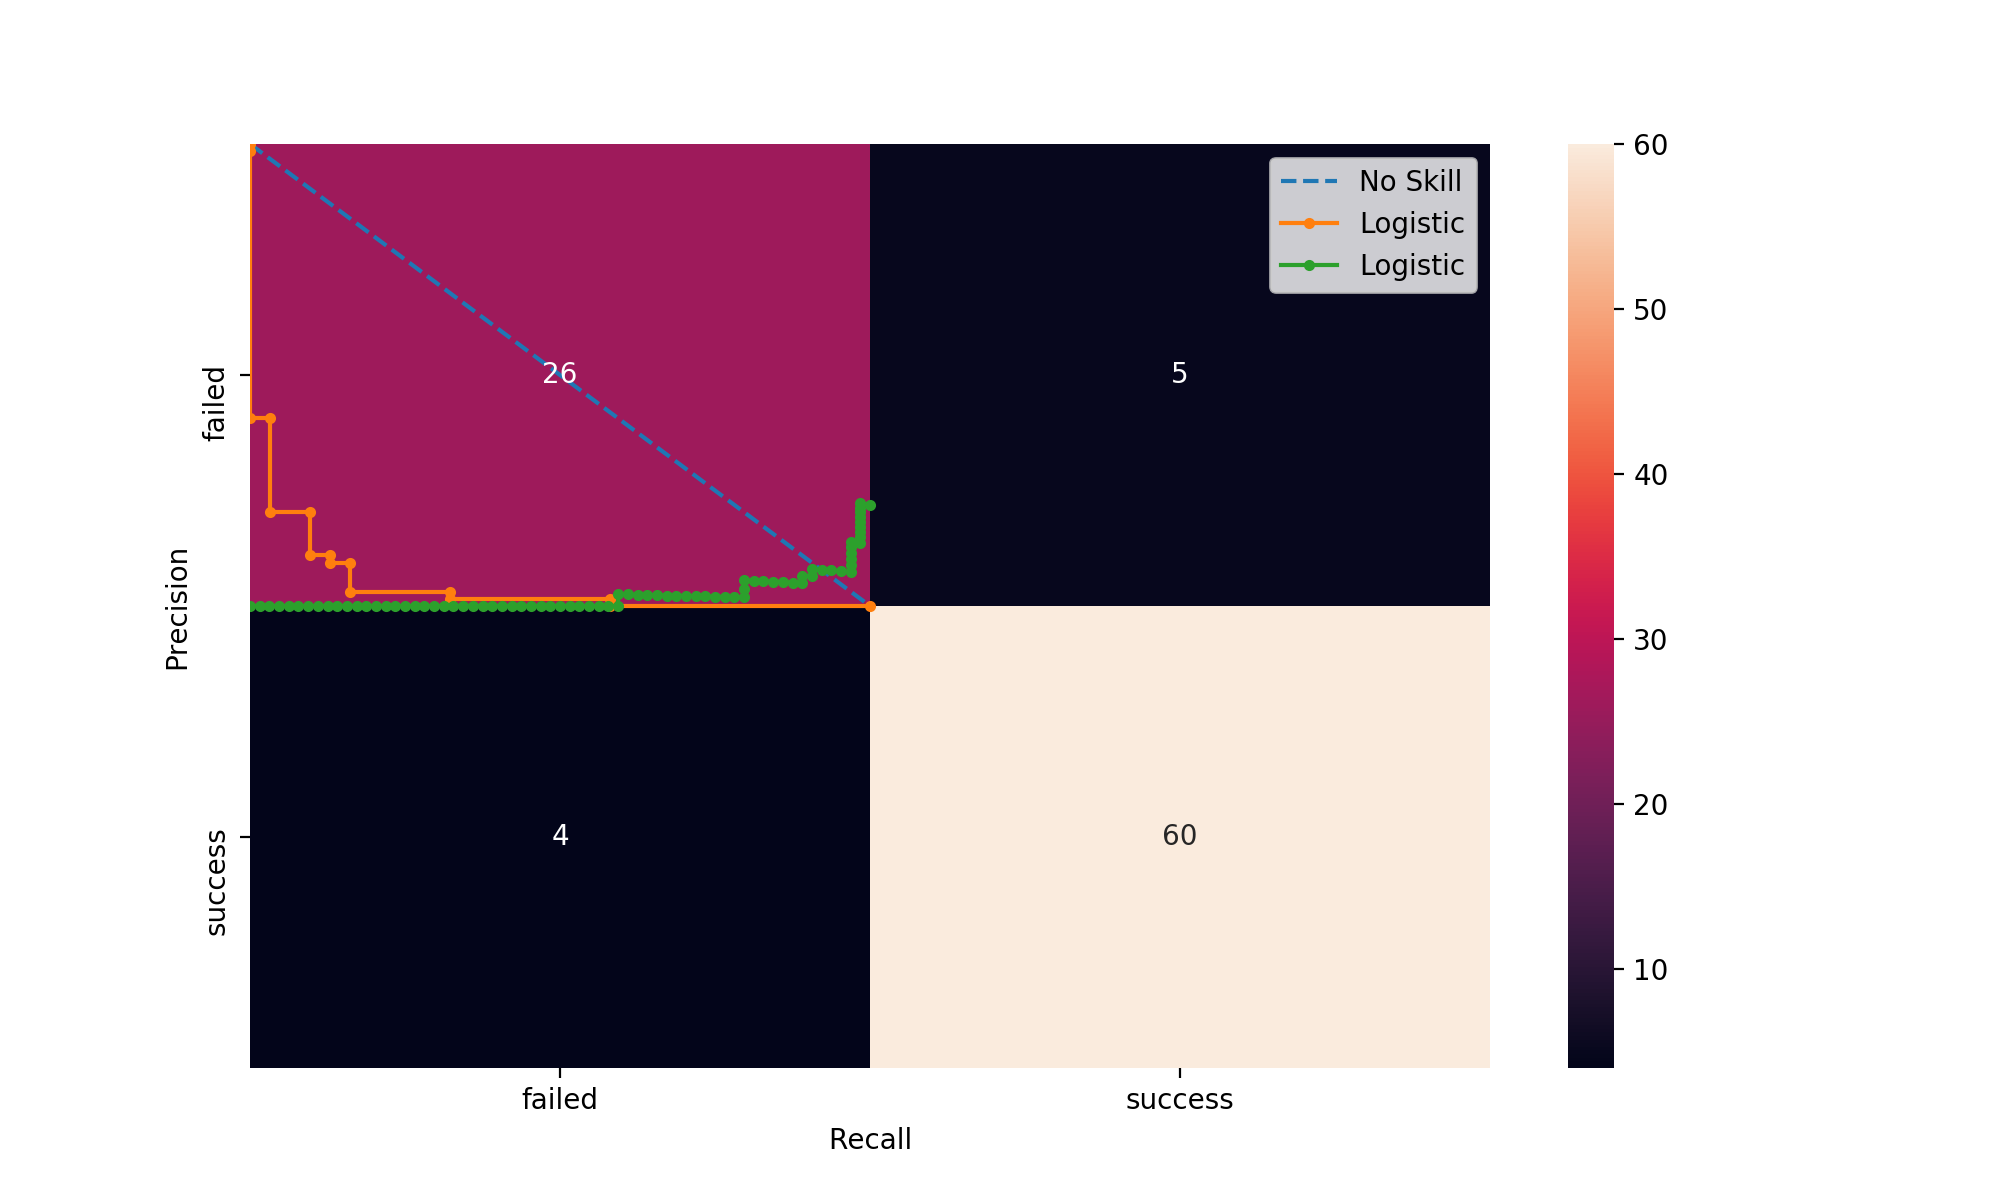

In [16]:
cm =confusion_matrix(testy, predicted)  
index = ['failed','success']    
cm_df = pd.DataFrame(cm,index,index) 
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True,fmt="d")
plt.show()

In [18]:
print(skm.classification_report( testy , predicted ))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.92      0.94      0.93        64

    accuracy                           0.91        95
   macro avg       0.89      0.89      0.89        95
weighted avg       0.90      0.91      0.90        95



## ROC-AUC curve

In [19]:
lr_probs = logistic.predict_proba(testX)
lr_probs = lr_probs[:, 1]

In [20]:
ns_probs = np.zeros(len(testy))

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Logistic: ROC AUC=0.958


## precision-recall curve

In [21]:
precisions, recalls, thresholds = precision_recall_curve(testy, lr_probs)

In [22]:
plt.plot(recalls, precisions, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

## Change decision threshold

<IPython.core.display.Javascript object>


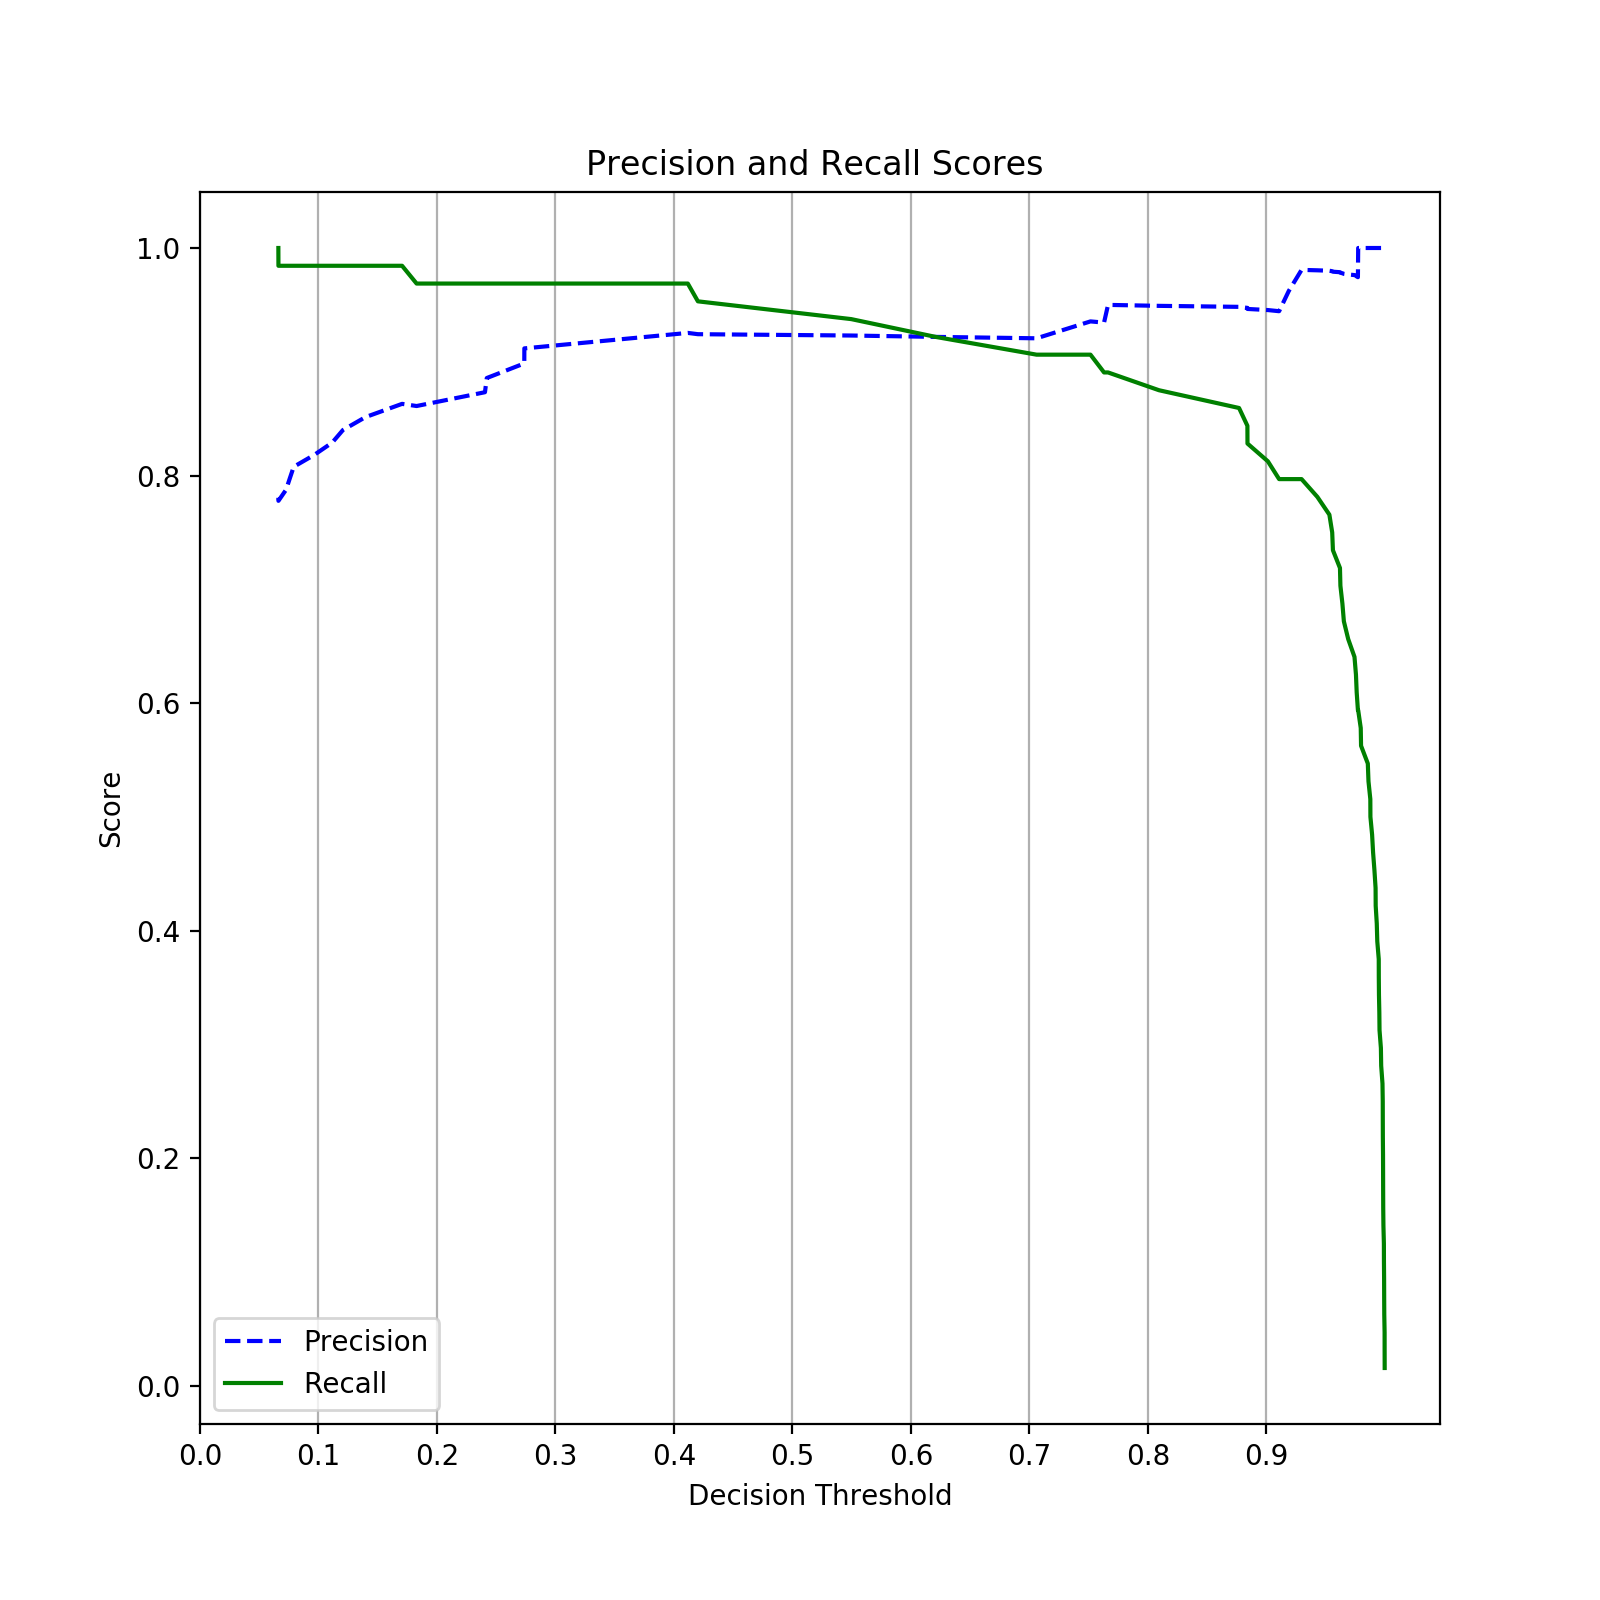

In [23]:
%matplotlib notebook
plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores ")
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.xticks(np.arange(0, 1, step=0.1)) 
plt.grid(axis='x')

plt.show()

In [24]:
lr_probs = logistic.predict_proba(testX)
lr_probs = lr_probs[:,0]

In [25]:
newpredict=np.where(lr_probs>0.6,0,1)

In [26]:
accuracy_score(testy,newpredict)

0.9263157894736842

In [27]:
scaler1 = StandardScaler()
scaler1.fit(x)
X = scaler.transform(x)


In [28]:
logistic1 = LogisticRegression()
logistic1.fit(X,label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pca1 = PCA(n_components=25)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
Xtransform=pca1.transform(X)

## Cross-validation score

In [31]:
predictedcros = cross_val_score(logistic1,Xtransform,label, cv=20)

In [32]:
predictedcros.mean()

0.8798007246376812

## Corelations with PCA

In [33]:
x.columns

Index(['company years', 'internet activity', 'industry_Advertising',
       'industry_Analytics', 'industry_Career / Job Search',
       'industry_Classifieds', 'industry_CleanTech',
       'industry_Cloud Computing', 'industry_E-Commerce', 'industry_Education',
       ...
       'Survival through recession, based on existence of the company through recession times_yes',
       'Gartner hype cycle stage_peak', 'Gartner hype cycle stage_plateau',
       'Gartner hype cycle stage_slope', 'Gartner hype cycle stage_trigger',
       'Gartner hype cycle stage_trough',
       'Time to maturity of technology (in years)_0 to 2',
       'Time to maturity of technology (in years)_0 to 5',
       'Time to maturity of technology (in years)_2 to 5',
       'Time to maturity of technology (in years)_5 to 10'],
      dtype='object', length=213)

In [34]:
data1=pd.DataFrame(X,columns=x.columns)

In [35]:
pcadf=pd.DataFrame(Xtransform)

In [36]:
data1['PCA1']=pcadf[0]

In [564]:
cor1=data1.corr()

In [565]:
pd.DataFrame(cor1[cor1['PCA1']>0.4]['PCA1']).sort_values('PCA1',ascending=False)

,PCA1
PCA1,1.000000
Big Data Business_yes,0.554186
Technical proficiencies to analyse and interpret unstructured data_yes,0.502946
Proprietary or patent position (competitive position)_yes,0.492858
Experience in Fortune 500 organizations_1,0.467022
Experience in Fortune 1000 organizations_1,0.466598
Catering to product/service across verticals_yes,0.457776
Number of of Research publications_many,0.448881
Local or global player_global,0.447301
Experience in selling and building products_high,0.446136


# MLP

In [299]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam

In [300]:
scaler = StandardScaler()
scaler.fit(train)
X_train = scaler.transform(train)
X_test = scaler.transform(test)

In [301]:
y_train = np_utils.to_categorical(trainy) 
y_test=np_utils.to_categorical(testy) 

In [302]:
X_test.shape

(95, 213)

In [303]:
y_test.shape

(95, 2)

In [455]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
#model.add(Dropout(0.8))
#model.add(Dense(20))
#model.add(Activation('relu'))
#model.add(Dropout(0.8))
model.add(Dense(2))
model.add(Activation('softmax'))

In [456]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 20)                4280      
_________________________________________________________________
activation_61 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 42        
_________________________________________________________________
activation_62 (Activation)   (None, 2)                 0         
Total params: 4,322
Trainable params: 4,322
Non-trainable params: 0
_________________________________________________________________


In [457]:
opt=Adam(lr=0.001)


In [458]:
opt=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [459]:
history=model.fit(X_train, y_train, nb_epoch=30, batch_size=16, validation_split=0.1, verbose=2)

/Users/gurgenblbulyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 339 samples, validate on 38 samples
Epoch 1/30
 - 1s - loss: 0.7546 - accuracy: 0.5988 - val_loss: 0.5176 - val_accuracy: 0.7632
Epoch 2/30
 - 0s - loss: 0.4449 - accuracy: 0.7876 - val_loss: 0.4068 - val_accuracy: 0.7895
Epoch 3/30
 - 0s - loss: 0.3190 - accuracy: 0.8850 - val_loss: 0.3663 - val_accuracy: 0.8684
Epoch 4/30
 - 0s - loss: 0.2507 - accuracy: 0.9056 - val_loss: 0.3449 - val_accuracy: 0.8684
Epoch 5/30
 - 0s - loss: 0.2047 - accuracy: 0.9351 - val_loss: 0.3331 - val_accuracy: 0.8947
Epoch 6/30
 - 0s - loss: 0.1691 - accuracy: 0.9587 - val_loss: 0.3208 - val_accuracy: 0.8947
Epoch 7/30
 - 0s - loss: 0.1405 - accuracy: 0.9617 - val_loss: 0.3119 - val_accuracy: 0.8947
Epoch 8/30
 - 0s - loss: 0.1161 - accuracy: 0.9764 - val_loss: 0.2995 - val_accuracy: 0.8947
Epoch 9/30
 - 0s - loss: 0.0991 - accuracy: 0.9794 - val_loss: 0.2956 - val_accuracy: 0.8947
Epoch 10/30
 - 0s - loss: 0.0833 - accuracy: 0.9882 - val_loss: 0.2979 - val_accuracy: 0.8947
Epoch 11/30
 - 0s - loss

<IPython.core.display.Javascript object>


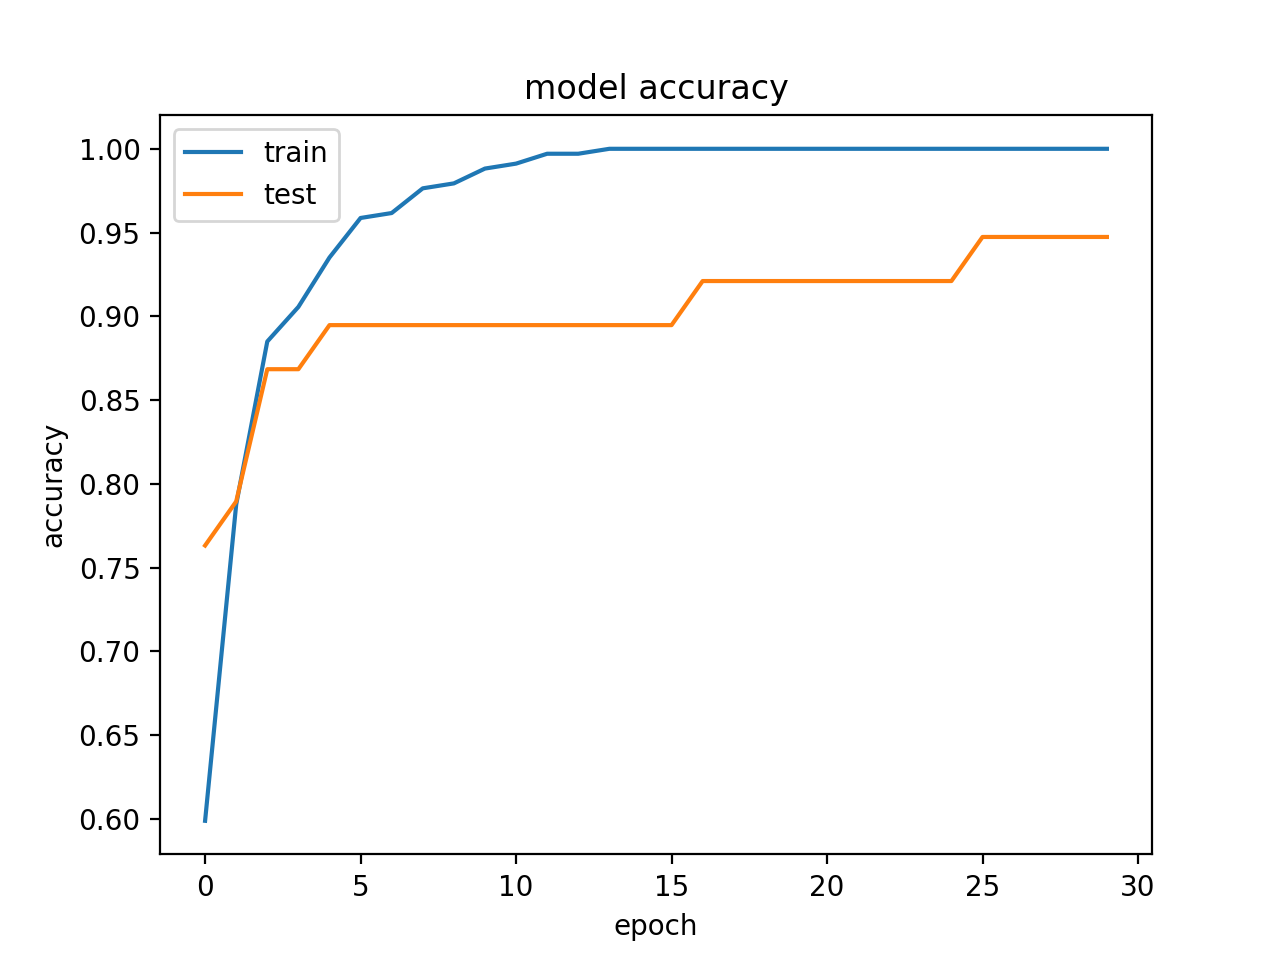

In [460]:
%matplotlib notebook
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


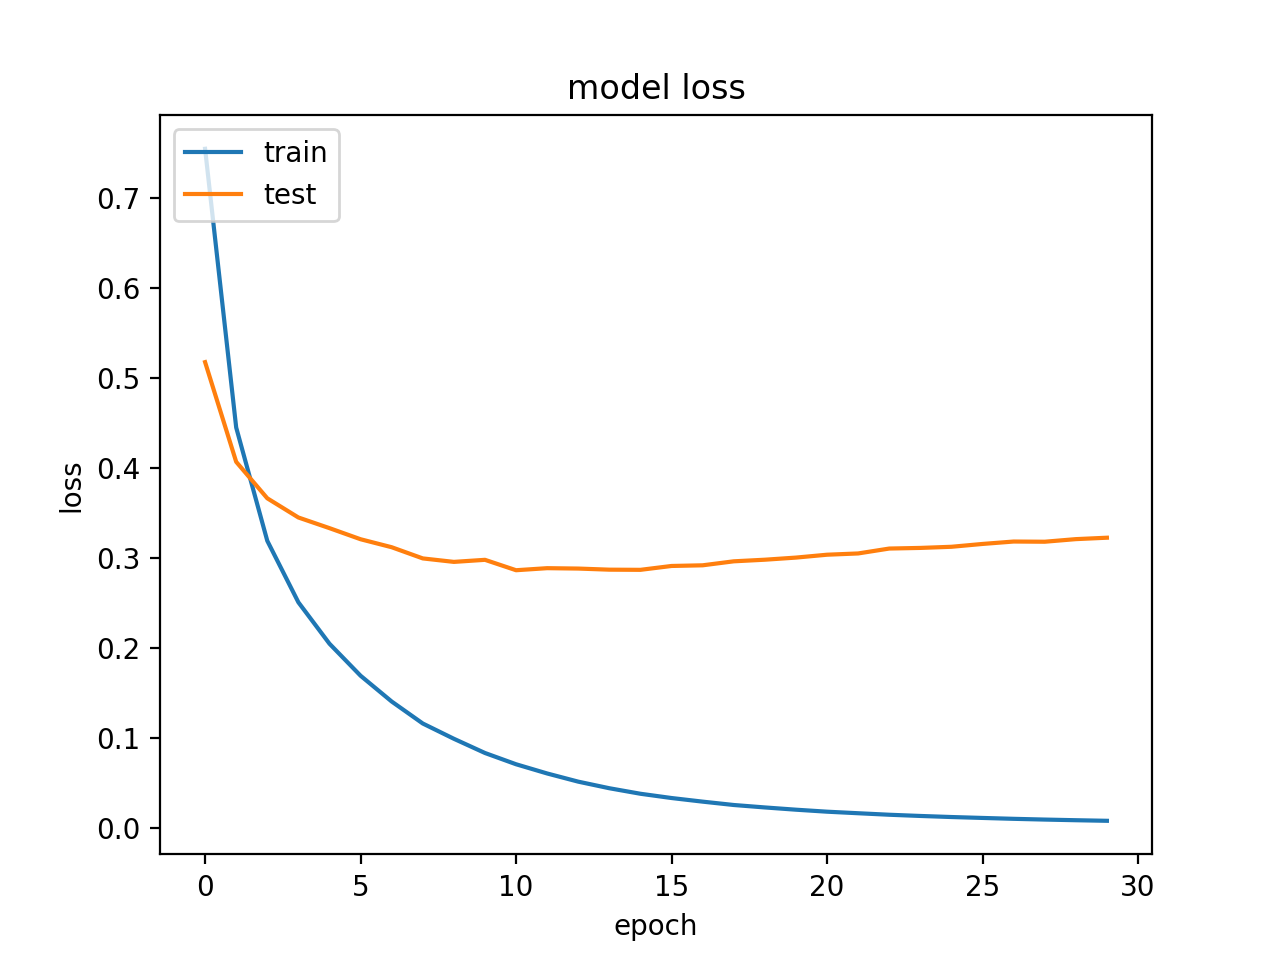

In [572]:
%matplotlib notebook
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [461]:
model.evaluate(X_test, y_test,verbose=0)[1]

0.8736842274665833